# Bayesian machine learning

- In the offline world it was sufficient to run experiments, ie. collect data, perform statistical tests and modify action based on that
- Today in the online world things are moving too fast. Web behaviour must be responsive and there is too much data to handle manually. Updating actions based on data must happen automatically, hence the use of bayesian machine learning

## Examples of A/B testing
- Medicine
    - A pharmaceutical company discovers a new drug for blood pressure and needs to find out if it works
    - Then perform and experiment. Select 1 group to give the drug and a second group to give a placebo
    - Measure the blood pressure of every person before and after their treatment and perform statistical tests to figure out if there is a difference between the groups
    
- Web pages
    - A website wants to optimize the number of visitors who purchase something (conversion rate)
    - Multiple versions of the website are used to test for trustworthiness of the design
    - A test is performed to see if one version peform better than another

## What is Bayesian machine learning?
- Bayes rule is just basic probability
- in the Bayesian approach, everything is a random variable
- suppose we want to measure the height of students in a class
    - frequentist approach:
        - measure the height of everyone in the class using a normal distribution
        - write down the likelihood of observing that data
        - use maximum likelihood estimation to figure out the parameters (mean and variance)
    - bayesian approach:
        - in the bayesian approach the parameters are not scalar numbers
        - they are probability distributions themselves
        
        
        

## Probability review
- marginal distributions: $p(A), p(B)$
- joint distribution: $p(A, B)$
- conditional distributions: $p(A|B), p(B|A)$

$p(A) = \sum_{B} p(A,B)$<br>
$p(B) = \sum_{A} p(A,B)$<br><br>
$p(A|B) = \frac{p(A,B)}{p(B)} = \frac{p(A,B)}{\sum_{A} p(A,B)}$<br>
$p(B|A) = \frac{p(A,B)}{p(A)} = \frac{p(A,B)}{\sum_{B} p(A,B)}$<br>

$p(B|A) = \frac{p(A,B)}{p(A)} = \frac{p(A|B)p(B))}{\sum_{B} p(A|B)p(B)}$<br><br>

- for continuous distributions, we call the probability distribution the probability density and instead of summations we integrate

## Examples
- suppose we want to find p(Buy|Country):<br>

|  | CA | US | MX |
|-|-|-|-|
| Buy = True | 20 | 50 | 10 |
| Buy = False | 300 | 500 | 200 | 

- an e-commerce website will likely be very interested if the website is performing poorly in a given country. The causes may be numerous: slower speed in given country due to distance from datacenters, irrevelant product placement etc.<br><br>

marginal probabilities
- p(country=CA) = 210/(210+550+320)=0.30
- p(country=US) = 550/(210+550+320)=0.51
- p(country=MX) = 210/(210+550+320)=0.19<br><br>

joint probabilities:
- p(Buy=True, Country=CA) = 20/1080 = 0.019
- p(Buy=False, Country=CA) = 300/1080 = 0.28
- p(Buy=True, Country=US) = 50/1080 = 0.046
- p(Buy=False, Country=US) = 500/1080 = 0.46
- p(Buy=True, Country=MX) = 10/1080 = 0.0093
- p(Buy=False, Country=MX) = 200/1080 = 0.185<br><br>

conditional probabilities:
- p(Buy=True|Country=CA) = 0.019/0.30 = 0.07
- p(Buy=False|Country=CA) = 0.28/0.30 = 0.93
- p(Buy=True|Country=US) = 0.046/0.51 = 0.09
- p(Buy=False|Country=US) = 0.46/0.51 = 0.91
- p(Buy=True|Country=MX) = 0.0093/0.19 = 0.05
- p(Buy=False|Country=MX) = 0.185/0.19 = 0.97<br><br>

Independence:<br>
$P(A,B) = P(A)P(B)$

Example:
- consider N succesive coin tosses
- the value of every successive coin toss is independent of the previous one, since it doesn't effect the probability
- we say the each coin toss is iid, independent and identically distributed
- meaning the the value of coin toss k is completely independent of all previous coin tosses
- the gambler's fallacy refers to the common thought process that if a person has lost many bets in a row, the probability of winning the next bet is somehow higher, since "it should average over time"


# Maximum likelihood estimation
- technique for statistical modelling
- trying to fit a model to the data, such that the parameters model the data as closely as possible

## Bernoulli distribution
$p(x) = \theta^x(1-\theta)^{1-x}$<br>
$data = \{x_1, \dots, x_n\}$<br>
$L(\theta) = p(data|\theta) = \prod_{i=1}^N p(x_i|\theta) = \prod_{i=1}^N \theta^x_i(1-\theta)^{1-x_i}$<br>
$log(L(\theta)) = l(\theta) = \sum_{i=1}^N {x_ilog(\theta) + \sum_{i=1}^N (1-x_i)log(1-\theta)}$
- the goal is to find the value for $\theta$ such taht the likelihood function is maximized<br>

$\frac{dl(\theta)}{d\theta} = \frac{\sum_{i=1}^N x_i}{\theta} - \frac{\sum_{i=1}^N (1-x_i)}{1-\theta} = 0$<br>
$\theta = \frac{\sum_{i=1}^N x_i}{N}$

## Normal distribution (TODO)

## Probability in code

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(0)

mu = 170
sd = 7

# generate samples from distribution
x = norm.rvs(loc=mu, scale=sd, size = 100)

# maximum likelihood mean
x.mean()

# maximum likelihood variance
x.var()

# maximum likelihood standard deviation
x.std()

# unbiased variance
x.var(ddof=1)

# unbiased standard deviation
x.std(ddof=1)

# at what height are you in the 95th percentile?
norm.ppf(0.95, loc=mu, scale=sd)

# you are 160 tall, what percentile are you in?
norm.cdf(160, loc=mu, scale=sd)

# you are 180 tall, what is the probability that someone is taller than you?
1 - norm.cdf(180, loc=mu, scale=sd)

0.07656372550983481

# Traditional A/B testing

# Bayesian A/B testing

## Explore-exploit dilemma
- exploitation = using the collected we already have in order make use of so far obtained data
- exploration = making random choices in order to obatain more data which we can exploit later
- greedy alrogithms are those that only exploit the data, which often leads to suboptimal results<br>

This sections is devoted to algorithms which attempt to solve this problem:
- epsilon-greedy
- optimistic initial values
- UCB1 (upper confidence bound)
- Thompson sampling (bayesian bandit)

All of these can be used in place of traditional A/B testing

## Epsilon-greedy
- insteady of always taking the greedy action, have some small probability of doing something random
- the probability is given by epsilon
- the reason for random actions is that we want to gather sufficient data about other possibilities
- but if one bandit is optimal, we don't want to spend time on the suboptimals ones in the long run
- to reduce this problem, we can select a decay schedule for epsilon
- lower epsilons take longer to converge on average, but the long time return will be higher after convergence

### Implementation trick
- to figure out the average number of wins, we calculate the sample mean
- to do so in constant time and space complexity, we calculate the mean incrementally<br>
$\bar{X}_N = \frac{1}{N}((N-1)*\bar{X}_{N-1} + X_N)$

### Pseudocode


### Code

optimal j: 5
mean estimate for bandit 0:  0.018348623853211007
mean estimate for bandit 1:  0.03947368421052631
mean estimate for bandit 2:  0.15384615384615388
mean estimate for bandit 3:  0.18018018018018017
mean estimate for bandit 4:  0.5412844036697245
mean estimate for bandit 5:  0.7492907428811587
total reward earned: 7227.0
overall win rate: 0.7227
num_times_explored: 506
num_time_exploited: 9494


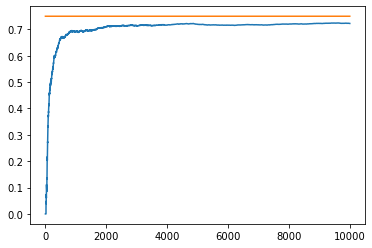

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import random

NUM_TRIALS = 10000
EPS = 0.05
BANDIT_PROBABILITIES = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        # p = winrate
        self.p = p
        self.p_estimate = 0
        self.N = 0
        
    def pull(self):
        # simulate draw
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N-1)*self.p_estimate + x)/self.N
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    for i in range(NUM_TRIALS):
        
        # use epsilod-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = random.randint(0, len(bandits)-1)
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
            
        # play bandit with largest sample rate
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update estimate
        bandits[j].update(x)
        
    for idx, b in enumerate(bandits):
        print(f"mean estimate for bandit {idx}: ", b.p_estimate)
        
    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_time_exploited:", num_times_exploited)
    
    # plot results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()    
    
experiment()

## Optimistic initial values
- get rid of epsilon part
- instead of initializing initial estimate to 0, pick a really large number and overestimate it
- early in the experiment when there's not a lot of data, the estimates will remain large
- as more data is collected, the estimates start to approach their true values
- the estimates do not necessarily converges
- the estimates of suboptimal bandits will get below the estimate of the optimal one and since this is a greedy algorithm, they will no longer be explored
- the optimal bandit's estimate need not be close to the true value either, since the estimate could have been high enough that the number of trials didn't make it converge
- higher values corespond to more exploration

### Code

optimal j: 5
mean estimate for bandit 0:  0.7142857142857143
mean estimate for bandit 1:  0.6666666666666666
mean estimate for bandit 2:  0.7
mean estimate for bandit 3:  0.6666666666666666
mean estimate for bandit 4:  0.7272727272727273
mean estimate for bandit 5:  0.7472328436305096
total reward earned: 7444.0
overall win rate: 0.7444
num_times_explored: 0
num_time_exploited: 10000
num times selected optimal bandit: 9937


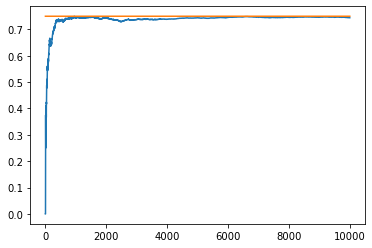

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import random

NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        # p = winrate
        self.p = p
        self.p_estimate = 5
        self.N = 1
        
    def pull(self):
        # simulate draw
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N-1)*self.p_estimate + x)/self.N
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    for i in range(NUM_TRIALS):
        num_times_exploited += 1
        j = np.argmax([b.p_estimate for b in bandits])
            
        if j == optimal_j:
            num_optimal += 1
            
        # play bandit with largest sample rate
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update estimate
        bandits[j].update(x)
        
    for idx, b in enumerate(bandits):
        print(f"mean estimate for bandit {idx}: ", b.p_estimate)
        
    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_time_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)
    
    # plot results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()    
    
experiment()

## UCB1 (TODO)
- a bunch of math, will finish later
- use bounding inequalities to estimate upper bound
- so instead of using a point estimate, use an interval estimate using Hoeffding's inequality<br>
$j = argmax(\bar{x}_{n_{j}} + \sqrt{2\frac{log{N}}{n_j}})$

### Code


optimal j: 5
mean estimate for bandit 0:  0.0
mean estimate for bandit 1:  0.03125
mean estimate for bandit 2:  0.03125
mean estimate for bandit 3:  0.2753623188405797
mean estimate for bandit 4:  0.4870466321243524
mean estimate for bandit 5:  0.7525388601036249
total reward earned: 7376.0
overall win rate: 0.7376


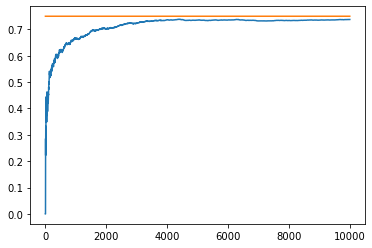

In [43]:
import matplotlib.pyplot as plt
import numpy as np

NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        # p = winrate
        self.p = p
        self.p_estimate = 0.
        self.N = 0.
        
    def pull(self):
        # simulate draw
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N-1)*self.p_estimate + x)/self.N
        
def ucb(mean, n, nj):
    return mean + np.sqrt(2*np.log(n) / nj)
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]   
    rewards = np.zeros(NUM_TRIALS)
    total_plays = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    # initialize by playing each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
    
    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
            
        # play bandit with largest sample rate
        x = bandits[j].pull()
        
        # update rewards log
        rewards[i] = x
        
        # update trial count
        total_plays += 1
        
        # update estimate
        bandits[j].update(x)
        
    for idx, b in enumerate(bandits):
        print(f"mean estimate for bandit {idx}: ", b.p_estimate)
        
    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    
    # plot results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()    
    
experiment()